### **Lets Grow more**
### **Data Science Internship(JAN-2023)**
### [Task: Develop A Neural Network That Can Read Handwriting](https://www.canva.com/design/DAEjrwWV35w/-gxHUkJMO1Zr4pYVVpOYcg/view?utm_content=DAEjrwWV35w&utm_campaign=designshare&utm_medium=link&utm_source=sharebutton#1)
### **Aman Gupta**



In [ ]:
# Using this location as a root Directory
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks/Deep learning"
os.chdir(ROOT)

In [ ]:
# Checking all the avaliable files
os.listdir()

['ANN_demo.ipynb']

### **Tensorflow is from google** 
### **Keras is wrapper which uses Tensorflow api now it is integrated from version 2.0**

In [ ]:
# Checking the tensorflow version
import tensorflow as tf
tf.__version__, tf.keras.__version__


('2.9.2', '2.9.0')

In [ ]:
# Checking if GPU is available
tf.config.list_logical_devices("GPU")

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]

### **A simple classifierusing keras's sequential API**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

# MNIST DATASET
* Its a dataset of handwritten digits
* Each data point is a 2D array of 28x28 
* It has 10 classes of 0-9
* [DataSet Description](https://en.wikipedia.org/wiki/MNIST_database)

In [ ]:
# loading the dataset
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [ ]:
# Shape and data-type of dataset
X_train_full.shape, X_test.shape, X_train_full.dtype, X_test.dtype

((60000, 28, 28), (10000, 28, 28), dtype('uint8'), dtype('uint8'))

In [ ]:
# splitting the dataset into training and validation part and normalizing them to 0 to 1
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

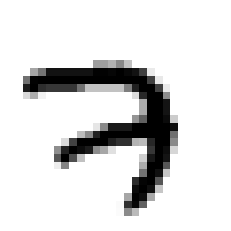

In [ ]:
# Ploting the first data in X_train
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
# Checking what its label
y_train[0]

7

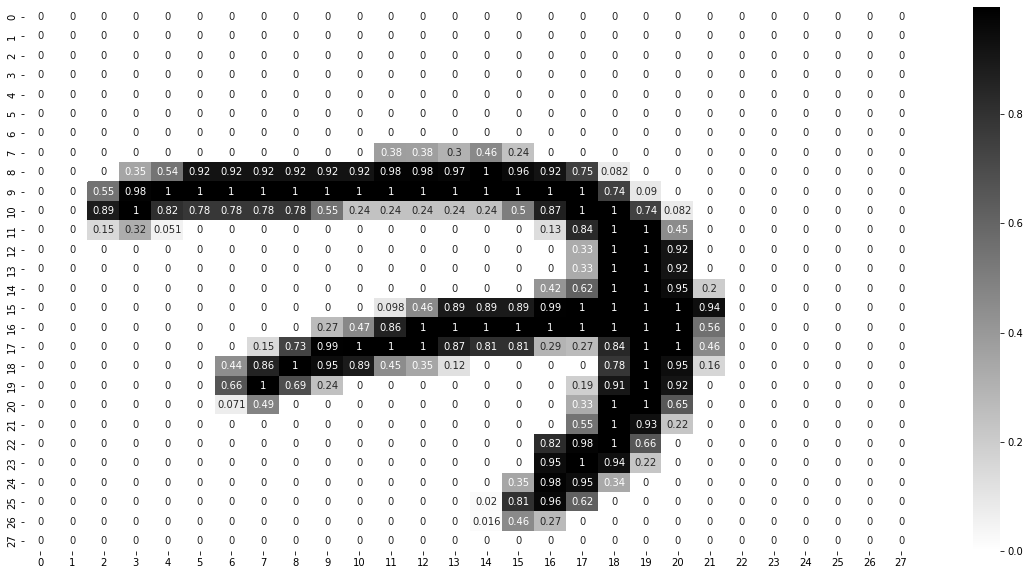

In [ ]:
# Checking the heatmap also
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(X_train[0], annot=True, cmap="binary")

### **Observations**
* Where ever White is there it is giving 0 and for black it is giving 0.99 clsoe to 1 and for grey  some middle values. 

# **LAYERS**
* Sequential layer:- It means the entire neural network as a block or sequence and can do forward and backword propogation
* Dense layer:- It is used to create neurons in the hidden layers, Input layers, Output layers
* Activation functions LeakyReLU, PReLU, ELU, ReLU :-  we are using activitation function in the hidden layer
* Dropout layer :- It is just like a regularization when we use it the neurons go dead or removed

In [ ]:
# Creating the layers
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [ ]:
# Creating the model
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hl1 = model.layers[1]
model.get_layer(hl1.name)

In [ ]:
weights, bias = hl1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
bias.shape

(300,)

## **Cost / Loss Function**
* Sparse Categorical Crossentropy:- This loss function is used to get One single Output with highest value (It ignores other output).

## **Optimizer**
* SGD (Stochastic Gradient Descent) :- It takes only one row as a input and updates the weights.

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

In [ ]:
model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

### Important -

* **Epochs**: Integer. 
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 

* **batch_size**: Integer or None. 
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32. 
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None. 

    Number of samples per validation batch. 
    
    If unspecified, will default to batch_size. 
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [ ]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5942 - accuracy: 0.8475 - val_loss: 0.3001 - val_accuracy: 0.9160
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2860 - accuracy: 0.9180 - val_loss: 0.2341 - val_accuracy: 0.9336
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2330 - accuracy: 0.9338 - val_loss: 0.2028 - val_accuracy: 0.9420
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1989 - accuracy: 0.9431 - val_loss: 0.1724 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1729 - accuracy: 0.9503 - val_loss: 0.1584 - val_accuracy: 0.9552
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1531 - accuracy: 0.9558 - val_loss: 0.1401 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1373 - accuracy: 0.9609 - val_loss: 0.1285 - val_accurac

In [ ]:
# Evaluatimg the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9790


[0.07034800946712494, 0.9789999723434448]

In [ ]:
# To savle the keras model we use .h5 extension
model.save("model.h5")

In [ ]:
# To load the model
load_model = tf.keras.models.load_model("model.h5")

In [ ]:
load_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9790


[0.07034800946712494, 0.9789999723434448]

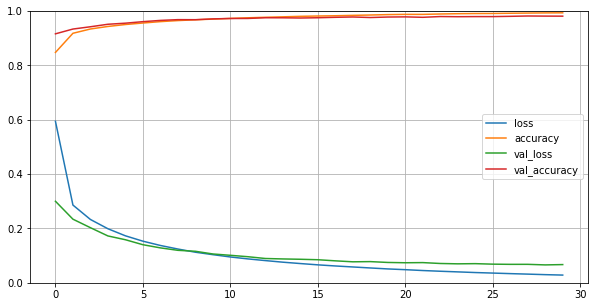

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
X_new = X_test[:3]
y_new = y_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 16ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis=1)
y_pred, y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

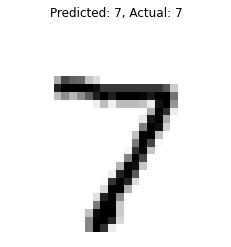

----------------------------------------


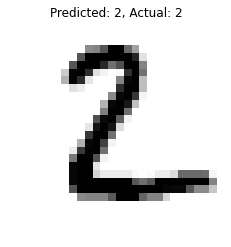

----------------------------------------


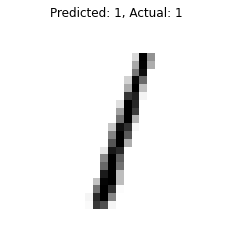

----------------------------------------


In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*20)